# Import Libraries

In [257]:
import numpy as np
import pandas as pd
from scipy import linalg

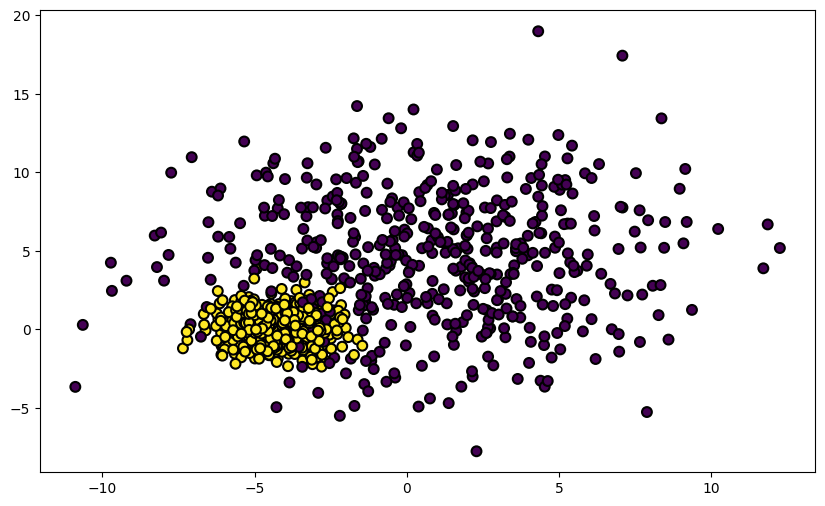

In [258]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

%matplotlib inline

n_samples = 1000

varied = datasets.make_blobs(n_samples=n_samples,
                             centers=2,
                             n_features=2,
                             cluster_std=[4, 1],
                             random_state=3)

X, y = varied[0], varied[1]

plt.figure( figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', lw=1.5, s=50, cmap=plt.get_cmap('viridis'))
plt.show()

In [259]:
from gaussian_mixture import GaussianMixture
from sklearn.decomposition import PCA

In [260]:
gm = GaussianMixture(n_components=2, init_params='k-means++', random_state=42, n_init=10)

In [261]:
y_gmix = gm.fit_predict(X)

In [262]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42, n_init=10, init='k-means++')

In [263]:
km.fit(X)

y_kmeans = km.predict(X)

# AIC and BIC

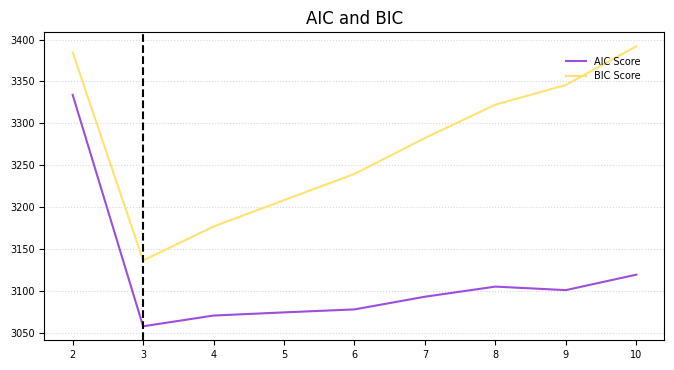

In [71]:
aic = []
bic = []


for i in range(2,11):
    gm = GaussianMixture(n_components=i, init_params='k-means++', random_state=42)
    gm.fit(clean_df)
    aic.append([i, gm.aic(clean_df)])
    bic.append([i, gm.bic(clean_df)])

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot([list[0] for list in aic], [list[1] for list in aic], color='#9D4EDD', label='AIC Score')
ax.plot([list[0] for list in bic], [list[1] for list in bic], color='#FFE270', label='BIC Score')
ax.legend(loc='upper right', borderpad=2, frameon=False, fontsize=7)
ax.set_title('AIC and BIC')
ax.tick_params(labelsize=7)
ax.grid(axis='x', alpha=0)
ax.grid(axis='y', alpha=0.5, linestyle='dotted')
ax.axvline(x=3, linestyle='dashed', color='k')

plt.show()

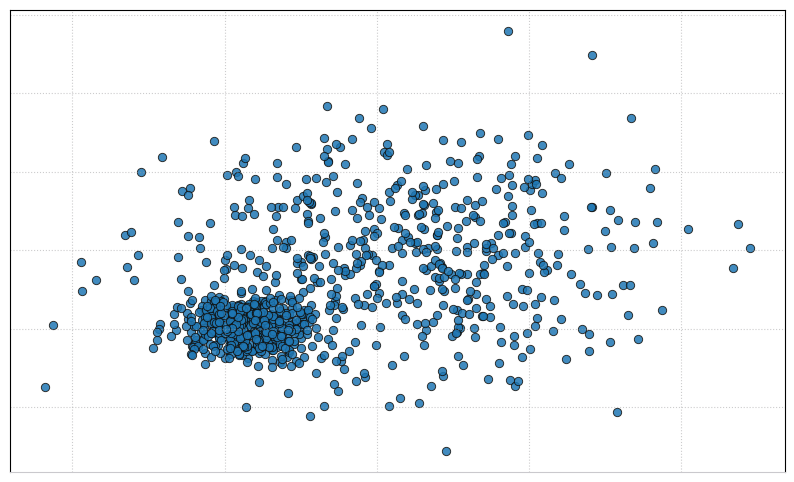

In [264]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=X[:, 0], y=X[:, 1], **scatter_style)

ax.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
ax.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('#CAC9CD')


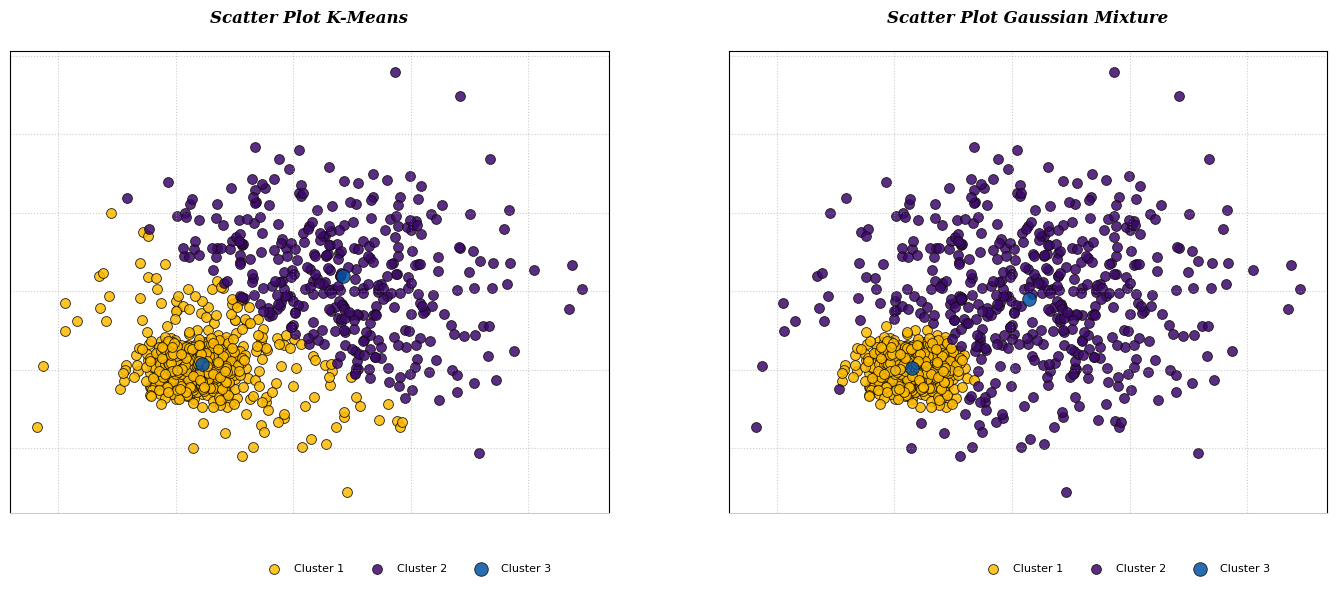

In [288]:
import matplotlib.pyplot as plt

cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids']
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
text_style=dict(fontweight='bold', fontfamily='serif')
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
legend_style=dict(borderpad=2, frameon=False, fontsize=8)

y_kmeans_ = list(set(y_kmeans))
y_gmix_ = list(set(y_gmix))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(17, 6))
for i in y_kmeans_:
    ax1.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], s=50, c=cluster_colors[i], **scatter_style)
ax1.scatter(km.cluster_centers_ [:,0], km.cluster_centers_[:,1], s=95, c="#0353A4", label='centroids', **scatter_style)
ax1.set_title('Scatter Plot K-Means\n', **title)
ax1.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
ax1.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
ax1.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_color('#CAC9CD')

for i in y_gmix_:
    ax2.scatter(X[y_gmix==i, 0], X[y_gmix==i, 1], s=50, c=cluster_colors[i], **scatter_style)
ax2.scatter(gm.means_[:,0], gm.means_[:,1], s=95, c="#0353A4", label='centroids', **scatter_style)
ax2.set_title('Scatter Plot Gaussian Mixture\n', **title)
ax2.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
ax2.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
ax2.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['bottom'].set_color('#CAC9CD')

# GAUSSIAN MIXTURE FUNC

------------

In [266]:
n_samples, n_features = X.shape
n_components = 2

<b>_closest_cluster_centers</b>

Find index of centroid, that closest per n-sample

In [267]:
def _closest_cluster_centers(sample, cluster_centers):
    
    closest_i = 0
    closest_dist = float('inf')
    
    for i, cluster_center in enumerate(cluster_centers):
        # calculate distance
        distance_i = np.linalg.norm(sample - cluster_center)
        
        # Check for the minimal distance
        if distance_i < closest_dist:
            closest_dist = distance_i
            closest_i = i
    
    # Return index for each sample
    return closest_i

<b>K-Means++</b>

Create <b>Responsibilities (γ(zk))</b> matrices with zeros n-k dimentions

For n = 1:N,<br>
Search index of closest centroid per n-sample (index-k) <br>
<br>
for <b>γ(zk)</b> with [n-sample, index-k] = 1 <br>
So, <b>γ(zk)</b> returns like [[0 1]
                    [1 0]
                    [0 1]]

e.g. for index sample-10, search closest centroid (if n_cluster is 2 will return between 0-1),<br>
for <b>γ(zk)</b> in sample-10 and centroid = 0, <br>
<b>γ(zk)</b>[10, 0] = 1 <br>
so <b>γ(zk)</b> in row 10, will be [0 1]

Value 1 in γ(zk) will stored based on closest cluster 

In [268]:
## ------- Get Centroid ---------- ##
# X = clean_df

# Create object list of centroid
cluster_centers=[]

# Create object of distance sample and probal sample based on number of samples
dist_sample= np.zeros(n_samples)
proba_sample= np.zeros(n_samples)

# Choose c1 randomly from data
c_0_ind = np.random.choice(n_samples) # index

# cluster_centers store the first centroid based on random samples
cluster_centers.append(X[c_0_ind])

# choose c2, c3, etc
## for k = 1 : K same with code below
for j in range(1, n_components):
    # Compute distance between data to the closest available centroid
    ## for n = 1 : N same with code below
    for i, sample_i in enumerate(X):
        # Find closest cluster centers
        # ind_i return as index of closest centroid
        ind_i = _closest_cluster_centers(sample_i,
                                        cluster_centers)
        
        # return value of closest centroid from sample_i
        cluster_centers_i = cluster_centers[int(ind_i)]
        
        # Find the distance 
        # return distance of sample [x,y] to closest centroid [x_c, y_c]
        # Function below is same with pythagoras concept in order to find garis miring
        dist_i = np.linalg.norm(sample_i - cluster_centers_i)
        
        # Append
        # Append distance of sample_i to closest centroid
        dist_sample[i] = dist_i 
        
    # Compute probability of a point
    # Compute probability of distance sample squared per total distance squared

    # dist_sample**2 : square of dist_sample per sample_i

    proba_sample = (dist_sample**2) / np.sum(dist_sample**2)

    # Generate random cluster centers based on the probability
    c_j_ind = np.random.choice(n_samples, p=proba_sample)

    # Append the cluster centers
    cluster_centers.append(X[c_j_ind])
    
cluster_centers = np.array(cluster_centers)
# print(cluster_centers)

# Assign data points to clusters
resp = np.zeros((n_samples, n_components))
for i, sample_i in enumerate(X):

    # return index of which cluster center is the closest one to sample_i (n) of N
    ind_i = _closest_cluster_centers(sample_i, cluster_centers)

    # Assign value of resp matrix with n and k as 1
    # Return resp : array 2-D
    resp[i, int(ind_i)] = 1
    
print(f'responsibilities: \n {resp}')

responsibilities: 
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [269]:
print(f'γ(zk) in row-2 : {resp[2]}')
print(f'for γ(zk) in row-2 and centroid-0 : {[resp[2, 0]]}')
print(f'for γ(zk) in row-2 and centroid-1 : {[resp[2, 1]]}')
print('*'*33)
print('so the closest centroid of sample-2 should be centroid-0, so γ(zk)[2,0] = 1')


γ(zk) in row-2 : [0. 1.]
for γ(zk) in row-2 and centroid-0 : [0.0]
for γ(zk) in row-2 and centroid-1 : [1.0]
*********************************
so the closest centroid of sample-2 should be centroid-0, so γ(zk)[2,0] = 1


$$N_{k} = \sum_{n=1}^{N} γ(z_{nk})+10 * \text{np.finfo}(X.\text{dtype}).\text{eps} $$

$$µ_{k} = \frac{1}{N_{k}}\sum_{n=1}^{N} γ(z_{nk}).X_{n}$$

<center>for <b>k</b> in <b>K (number of centroid):</center></b><br>

$$Σ_{k} = \frac{1}{N_{k}} (γ(z_{nk})\text{per-axis}  . (X - µ_{k}[k])^{T}) * (X - µ_{k}[k])$$



In [270]:
nk = resp.sum(axis=0) + 10 * np.finfo(resp.dtype).eps
means = np.dot(resp.T, X) / nk[:, np.newaxis]

reg_covar = 1e-6
covariance_type = 'full'

print(f'Nk: \n {nk}')
print('')
print(f'means: \n {means}')

Nk: 
 [721. 279.]

means: 
 [[-3.719455    1.9261103 ]
 [ 3.30292275  3.46141677]]


In [271]:
n_components_centroid, n_features_centroid = means.shape
covariances = np.empty((n_components, n_features, n_features))

for k in range(n_components_centroid):
    diff = X - means[k]
    
    print(f'means cluster {k}')
    print(means[k])
    
    covariances[k] = np.dot(resp[:, k] * diff.T, diff) / nk[k]
    
    covariances[k].flat[:: n_features_centroid + 1] += reg_covar
    
    print("="*33)

print("=============  Final Σk  =============")
print(covariances)

means cluster 0
[-3.719455   1.9261103]
means cluster 1
[3.30292275 3.46141677]
=============  Final Σk  =============
[[[ 3.4944788   3.4516994 ]
  [ 3.4516994  12.18372083]]

 [[ 7.3564473   4.11409392]
  [ 4.11409392 16.41696358]]]


# **E-STEP**

<b>_estimate_gaussian_parameters_full</b>

Calculate covariances of Gaussian Mixture model with
N<sub>k</sub>, means, and reg_covar = 0.000001

In [191]:
def _estimate_gaussian_parameters_full(resp, X, nk, means, reg_covar):

    # n_components is centroid X-axis
    # n_features is centroid Y-axis
    n_components, n_features = means.shape

    # Create ndarray of empty
    covariances = np.empty((n_components, n_features, n_features))

    # for k [X,y] of each centroid
    for k in range(n_components):
        diff = X - means[k]
        covariances[k] = np.dot(resp[:, k] * diff.T, diff) / nk[k]
        covariances[k].flat[:: n_features + 1] += reg_covar
    
    return covariances


<b>_estimate_gaussian_parameters</b>

Initialize N<sub>k</sub> to find <b>means (µ<sub>k</sub>)</b> of cluster, and <b>covariances (Σ<sub>k</sub>)</b> based on equation above<br>
N<sub>k</sub> could become <b>weight (π<sub>k</sub>)</b>

<b>Σ<sub>k</sub></b> represent the volume or spread of gaussian distribution initial.
<center>
<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/covariances.png" alt="covariances" width='35%'><br>
<i style="font-size: 14px;">How Covariance affect distributions (https://www.visiondummy.com/)</i>
</center>

Cholesky decomposition is used in the context of Gaussian Mixture Models (GMMs) to estimate the precision (inverse covariance) matrices for each component of the GMM. The precision matrices are an essential parameter in GMMs as they define the shape and orientation of the multivariate Gaussian distributions that make up the mixture.

<center>
<img src="https://www.researchgate.net/profile/Ryan-Kastner/publication/220094411/figure/fig3/AS:305823059333124@1449925307367/Cholesky-decomposition-algorithm-is-presented-in-a-The-resulting-matrices-of-the.png" alt="cholesky" width="35%">
</center>

In GMM parameter estimation, one common approach is to estimate the mean and covariance matrix for each component using the Expectation-Maximization (EM) algorithm. However, <mark><b>estimating the covariance matrix directly can be challenging because it needs to be positive definite. In some cases, it may become ill-conditioned or singular, causing numerical instability or convergence issues. </b></mark>

To overcome these challenges, Cholesky decomposition is often employed. Here's how it is used in the GMM parameter estimation process:

1. During the E-step of the EM algorithm, the <b>responsibilities (posterior probabilities) of each component for each data point are calculated</b>. These responsibilities are used to estimate the mean and covariance matrix for each component.

2. Instead of estimating the covariance matrix directly, the Cholesky decomposition is applied to the covariance matrix. The Cholesky decomposition expresses the covariance matrix as the product of a lower triangular matrix and its transpose.

3. <b>By decomposing the covariance matrix using Cholesky decomposition, the estimation of the precision matrix (inverse covariance) becomes more stable</b>. The precision matrix is used in the M-step of the EM algorithm to update the parameters of the GMM, including the mean and covariance matrix for each component.

4. The precision matrix obtained from <b>Cholesky decomposition is used to compute the updated mean and covariance matrix for each component</b>, <mark>ensuring positive definiteness and improving numerical stability.</mark>

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/Cholesky.jpg" alt="chole">
</center>

The Cholesky decomposition of a Hermitian positive-definite matrix A is a decomposition of the form <mark><b>A = [L][L]T</b></mark>, where <b>L is a lower triangular matrix with real and positive diagonal entries</b>, and <b>LT denotes the conjugate transpose of L</b>. Every Hermitian positive-definite matrix (and thus also every real-valued symmetric positive-definite matrix) has a unique Cholesky decomposition.

[Cholesky Factor](http://www.euroinformatica.ro/cholesky-factorization/)

<blockquote>

<center>
<img src="https://qph.cf2.quoracdn.net/main-qimg-2f5bed15dd8f4816735edbe520a16da3-pjlq" alt="cholesky decom" width="45%">
</center>

In summary, <b>Cholesky decomposition is utilized in GMM parameter estimation to handle the estimation of precision matrices, which are the inverse of the covariance matrices</b>. It provides a stable and efficient approach for estimating the covariance structure of each component in a Gaussian Mixture Model.
<br>

Using Cholesky decomposition in the estimation of inverse covariance matrices provides several benefits that contribute to increased stability:

<blockquote>

- <b>Avoiding Singularity:</b> Cholesky decomposition helps address issues related to singularity or near-singularity of the covariance matrix. A covariance matrix needs to be positive definite for a valid Gaussian distribution. However, <b>in some cases, the estimated covariance matrix may become singular or close to being singular due to collinearity or insufficient data.</b> Cholesky decomposition can still be applied to such matrices, providing a decomposition that avoids explicit inversion.

- <b>Constraint Enforcement:</b> The decomposition ensures that the <b>precision matrix (inverse covariance)</b> remains positive definite, as the covariance matrix is positive definite by definition. This constraint is crucial as the precision matrix is used to define the shape and orientation of the Gaussian distributions in the GMM. Cholesky decomposition helps maintain positive definiteness while estimating the inverse covariance matrices.
</blockquote>

In [197]:
def _compute_precision_cholesky(covariances, covariance_type):
    """
    Overall, this code iterates over a set of covariance matrices, 
    computes the Cholesky decomposition for each covariance matrix, 
    and then uses it to compute the corresponding precision matrix. 
    The precision matrices are stored in the precisions_chol array.
    
    Precisions cholesky is inverse covariance
    """
    
    estimate_precision_error_message = (
        "Fitting the mixture model failed because some components have "
        "ill-defined empirical covariances (for instance caused  by singleton) "
        "or collapsed sample). Try to decrease the number of components, "
        "or increase reg_covar."
    )
    
    if covariance_type == "full":
        n_components, n_features, _ = covariances.shape

        # From covariances shape follow number of cluster, returns (2, 2, 2)
        # n_components = 2; n_features = 2
        precisions_chol = np.empty((n_components, n_features, n_features))
        
        for k, covariance in enumerate(covariances):
            try:
                # The Cholesky decomposition is a factorization of a positive definite matrix into the product of 
                # a lower triangular matrix and its conjugate transpose, follows:
                ## A = L * L.T
                
                cov_chol = linalg.cholesky(covariance, lower=True)
                
            except linalg.LinAlgError:
                raise ValueError(estimate_precision_error_message)
                
            # solves a linear system of equations with a triangular matrix.
            # A lower triangular matrix has zeros above the main diagonal
            # Given a triangular matrix A and a vector b, the function solves the equation Ax = b for x.
            # solve_triangular and transpose for every cluster 
               
            precisions_chol[k] = linalg.solve_triangular(
                cov_chol, np.eye(n_features), lower = True
            ).T

    else:
        if np.any(np.less_equal(covariances, 0.0)):
            raise ValueError(estimate_precision_error_message)
        precisions_chol = 1.0 / np.sqrt(covariances)
    
    return precisions_chol

In [225]:
precisions_init = None
reg_covar = 1e-6
tol = 1e-3
covariance_type = 'full'

def _initialize(X, resp):
    n_samples, _ = X.shape
    
    # Get first π_k, μ_k, Σ_k
    weights, means, covariances = _estimate_gaussian_parameters(
        X, resp, reg_covar, covariance_type
    )
    
    # π_k for all observed point or samples
    weights /= n_samples

    # Assign to weights_ and means_
    weights_ = weights
    means_ = means
    
    if precisions_init is None:
        covariances_ = covariances
        precisions_cholesky_ = _compute_precision_cholesky(
            covariances, covariance_type
        )
    
    elif covariance_type == "full":
        precisions_cholesky_ = np.array(
            [
                linalg.cholesky(prec_init, lower=True)
                for prec_init in precisions_init
            ]
        )
    
    elif covariance_type == 'tied':
        precisions_cholesky_ = linalg.cholesky(
            precisions_init, lower = True
        )
    
    else:
        precisions_cholesky_ = np.sqrt(precisions_init)
        
    print(f'means : \n {means_}')
    print('')
    print(f'weights : \n {weights_}')
    print('')
    print(f'covariances : \n {covariances_}')
    print('')
    print(f'precision cholesky (inverse covariances): \n {precisions_cholesky_}')
    
    return weights_, means_, covariances_, precisions_cholesky_

In [226]:
weights_, means_, covariances_, precisions_cholesky_ = _initialize(X, resp)

means : 
 [[-3.91598755  0.27345996]
 [ 1.94209926  5.92835356]]

weights : 
 [0.632 0.368]

covariances : 
 [[[ 3.34535599 -0.98919749]
  [-0.98919749  2.79543402]]

 [[11.94636638 -3.46205324]
  [-3.46205324 12.59503417]]]

precision cholesky (inverse covariances): 
 [[[0.54673746 0.18690281]
  [0.         0.63208454]]

 [[0.28932242 0.08511846]
  [0.         0.2937148 ]]]


> log_det_chol = np.sum(
    np.log(matrix_chol.reshape(n_components, -1)[:, :: n_features + 1]), 1
)

<b>[:, :: n_features + 1]</b> slices the reshaped matrix, selecting every (n_features + 1)-th element along each row. This step is performed to <b>extract the diagonal elements of each Cholesky matrix, which are the square roots of the diagonal elements of the corresponding precision matrix.</b>

<mark>The resulting array log_det_chol contains the log determinants of the Cholesky matrices, which <b>provide information about the volume or spread of the Gaussian distributions in the Gaussian Mixture Model.</b> </mark>

In [232]:
def _compute_log_det_cholesky(matrix_chol, covariance_type, n_features):
    """Compute Log Determinant for each component k (cluster) from inverse covariance."""
    
    if covariance_type == "full":
        n_components, _, _ = matrix_chol.shape
        # Find log determinant
        # Sum all log determinant of each Cholesky matrix for each component k-cluster.
        log_det_chol = np.sum(
            np.log(matrix_chol.reshape(n_components, -1)[:, :: n_features + 1]), 1
        )
    
        # The resulting array log_det_chol contains the log determinants of the Cholesky matrices, 
        # which provide information about the volume or spread of the Gaussian distributions in the Gaussian Mixture Model.
        
    elif covariance_type == "tied":
        log_det_chol = np.sum(np.log(np.diag(matrix_chol)))

    elif covariance_type == "diag":
        log_det_chol = np.sum(np.log(matrix_chol), axis=1)

    else:
        log_det_chol = n_features * (np.log(matrix_chol))
        
    print(f'log determinant: \n {log_det_chol}')

    return log_det_chol

<b>_estimate_log_gaussian_prob</b>

computes the log probability of each data point belonging to each component of the GMM.
    
calculates the log probabilities of each data point belonging to each component of the GMM. 
It computes the transformed data point for each component using the precision matrix and mean, 
and then calculates the squared Euclidean distance between the transformed data point and the mean. 
The resulting log probability values are stored in the log_prob array.

Final, calculate the log-likelihood of each data point

- <b> n_features * np.log(2 * np.pi):</b> This term represents a constant factor in the log-likelihood calculation, In GMMs, this term is multiplied by -0.5 as it appears in the exponent of the Gaussian probability density function (PDF).
- <b> log_prob:</b> This term represents the log probabilities of each data point belonging to each component of the GMM,<br>
2-D array (n_samples, n_components)
- <b>log_det_chol:</b> This term represents the log determinants of the Cholesky matrices, which provide information about the volume or spread of the Gaussian distributions in the GMM.<br>
    1D array (n_components)



In [233]:
def _estimate_log_gaussian_prob(X, means, precisions_chol, covariance_type):

    n_samples, n_features = X.shape
    n_components, _ = means.shape

    # The determinant of the precision matrix from the Cholesky decomposition
    # corresponds to the negative half of the determinant of the full precision
    # matrix.
    # In short: det(precision_chol) = - det(precision) / 2
    
    # Find log determinant which contain info of volume or spread of gaussian distribution
    log_det = _compute_log_det_cholesky(precisions_chol, covariance_type, n_features)

    if covariance_type == "full":
        # Initialize an empty array log_prob to store the log probabilities
        log_prob = np.empty((n_samples, n_components))
        
        # Compute the log probability for each data point and each component
        # enumerat iterates over each GMM component's mean (mu) and Cholesky decomposition of the precision matrix (prec_chol).
        for k, (mu, prec_chol) in enumerate(zip(means, precisions_chol)):
            
            # y represents the transformed data point by multiplying it with the precision matrix and subtracting the mean.
            y = np.dot(X, prec_chol) - np.dot(mu, prec_chol)
            log_prob[:, k] = np.sum(np.square(y), axis=1)

    elif covariance_type == "tied":
        log_prob = np.empty((n_samples, n_components))
        for k, mu in enumerate(means):
            y = np.dot(X, precisions_chol) - np.dot(mu, precisions_chol)
            log_prob[:, k] = np.sum(np.square(y), axis=1)

    elif covariance_type == "diag":
        precisions = precisions_chol**2
        log_prob = (
            np.sum((means**2 * precisions), 1)
            - 2.0 * np.dot(X, (means * precisions).T)
            + np.dot(X**2, precisions.T)
        )

    elif covariance_type == "spherical":
        precisions = precisions_chol**2
        log_prob = (
            np.sum(means**2, 1) * precisions
            - 2 * np.dot(X, means.T * precisions)
            + np.outer(row_norms(X, squared=True), precisions)
        )
    # Since we are using the precision of the Cholesky decomposition,
    # `- 0.5 * log_det_precision` becomes `+ log_det_precision_chol
    # 
    # calculate the log-likelihood of each data point
    print(f'log-probabilities: \n {log_prob}')
    print('')
    
    return -0.5 * (n_features * np.log(2 * np.pi) + log_prob) + log_det

<b>_estimate_weighted_log_prob </b>

in practice, the <b>weights can be very small or large numbers</b>, especially when dealing with a large number of components or when the data distribution is complex.

taking the <mark>logarithm of the weights</mark>, the weighted log probabilities can be calculated more efficiently and accurately, without sacrificing numerical stability. <b>The logarithm of the weights is added to the log-likelihood of each data point to obtain the weighted log probability, which represents the logarithmic measure of the probability of a data point belonging to each component in the GMM.</b>


In [234]:
def _estimate_log_prob(X):

    return _estimate_log_gaussian_prob(
        X, means_, precisions_cholesky_, covariance_type
    )

def _estimate_log_weights():
    print(f'log weight: \n {np.log(weights_)}')
    print('')
    
    return np.log(weights_)

<b>_estimate_weighted_log_prob</b>

$$ln \  p(X,Z|µ, Σ,π) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \text{ \{ } {ln \ π_{k} + ln \ N(X_{n}|µ_{k},Σ_{k})} \text{ \} }$$

In [220]:
def _estimate_weighted_log_prob(X):
    
    print(f'estimate weighted log-probabilities: \n {_estimate_log_prob(X) + _estimate_log_weights()}')
    print('')
    
    return _estimate_log_prob(X) + _estimate_log_weights()

<b>_estimate_log_prob_resp</b>

calculates the normalized log probabilities and the log responsibilities in the context of Gaussian Mixture Models (GMMs)

- <b>log_prob_norm:</b> This line calculates the log-sum-exp of the weighted_log_prob along axis 1, which normalizes the probabilities for each data point
- <b>with np.errstate(under="ignore")::</b> This context manager temporarily ignores warnings related to underflow
- <b>log_resp:</b> This line calculates the log responsibilities by <mark>subtracting the log_prob_norm from weighted_log_prob</mark>. The log_prob_norm is reshaped using [:, np.newaxis] to align its dimensions with weighted_log_prob. The resulting log_resp is an array of shape (n_samples, n_components).

Finally, the function returns both <mark><b>log_prob_norm</mark>, which represents the normalized log probabilities</b>, and <mark><b>log_resp</mark>, which represents the log responsibilities for each data point and each component in the GMM</b>

These values are often used in GMM algorithms for tasks such as assigning data points to components or updating the parameters of the GMM during expectation-maximization iterations.

In [235]:
from scipy.special import logsumexp

def _estimate_log_prob_resp(X):
    
    weighted_log_prob = _estimate_weighted_log_prob(X)

    # logsumexp(X) = np.log(np.sum(np.exp(X)))
    
    log_prob_norm = logsumexp(weighted_log_prob, axis=1)
    with np.errstate(under="ignore"):
        # ignore underflow
        log_resp = weighted_log_prob - log_prob_norm[:, np.newaxis]
        
    print(f'log responsibilities: \n {log_resp}')
    print('')
    print(f'log prob norm as converged evaluation: \n {log_prob_norm}')
        
    return log_prob_norm, log_resp

<b>E-Step</b> return mean of normalized log probabilities and log responsibilities for each data point and each component in GMM

In [272]:
def _e_step(X):

    log_prob_norm, log_resp = _estimate_log_prob_resp(X)
    return np.mean(log_prob_norm), log_resp

In [273]:
log_prob_norm2, log_resp2 = _e_step(X)

log determinant: 
 [-1.06251868 -2.46535963]
log-probabilities: 
 [[ 0.30978184  7.58086252]
 [53.83038248  0.65836944]
 [68.63786633  1.62583009]
 ...
 [ 2.467564   11.54541717]
 [75.76189876  2.22849331]
 [ 2.00681288 11.78103987]]

log weight: 
 [-0.45886588 -0.99967234]

estimate weighted log-probabilities: 
 [[ -3.51415255  -9.0933403 ]
 [-30.27445287  -5.63209376]
 [-37.6781948   -6.11582409]
 ...
 [ -4.59304363 -11.07561763]
 [-41.24021101  -6.4171557 ]
 [ -4.36266807 -11.19342898]]

log determinant: 
 [-1.06251868 -2.46535963]
log-probabilities: 
 [[ 0.30978184  7.58086252]
 [53.83038248  0.65836944]
 [68.63786633  1.62583009]
 ...
 [ 2.467564   11.54541717]
 [75.76189876  2.22849331]
 [ 2.00681288 11.78103987]]

log weight: 
 [-0.45886588 -0.99967234]

log responsibilities: 
 [[-3.76852122e-03 -5.58295627e+00]
 [-2.46423591e+01 -1.98587813e-11]
 [-3.15623707e+01 -1.95399252e-14]
 ...
 [-1.52869868e-03 -6.48410270e+00]
 [-3.48230553e+01 -8.88178420e-16]
 [-1.07945318e-03 -6.831

------------------------

<b>M-STEP</b>

- <b>np.exp(log_resp):</b> 
By exponentiating the log_resp values, we convert them back to the original probability space and can use them to update the GMM parameters in the M-step of the algorithm.

1. <mark><b>Logarithmic Space:</b></mark> In the E-step of the GMM algorithm, the logarithms of the responsibilities (log_resp) are <b>calculated for numerical stability and efficiency.</b> The logarithms are used to avoid underflow and to simplify computations by converting multiplications into additions. However, <b>in the M-step, we need to work with the actual probabilities rather than their logarithms to update the GMM parameters.</b>

2. <mark><b>Exponentiation:</b></mark> By taking the exponential of the log_resp values, we <b>obtain the actual responsibilities (resp)</b>. Exponentiation is the inverse operation of the logarithm, so <b>applying np.exp(log_resp) brings the values back to the original probability space.</b>

3. <mark><b>Normalization:</b></mark> After obtaining the responsibilities (resp) by exponentiating the log_resp values, we <b>normalize them by dividing each row (responsibilities for a specific data point) by its sum</b>. This normalization ensures that the responsibilities for each data point sum up to 1, satisfying the requirement of a valid probability distribution.

4. <mark><b>Weighted Means and Covariances:</b></mark> The updated weights, means, and covariances are calculated based on the <b>normalized responsibilities.</b> The weights are obtained by averaging the responsibilities across all data points. The means are calculated as weighted averages of the data points, where the weights are the responsibilities. The covariances are computed as weighted covariances, taking into account the responsibilities and the differences between the data points and the means.

By <b>normalizing the weights and recomputing the inverse covariances</b>, we ensure that the GMM parameters are updated correctly and that subsequent iterations of the algorithm can proceed reliably

In [245]:
def _m_step(X, log_resp):
    
    # Initialize Nk, means and covariances
    weights_, means_, covariances_ = _estimate_gaussian_parameters(
        X, np.exp(log_resp), reg_covar, covariance_type
    )
    
    print(f'updated means: \n {means_}')
    print('')
    print(f'updated covariances: \n {covariances_}')
    print('')
    
    # Weight normalization
    # This normalization guarantees that the weights sum up to 1, representing the probabilities of the GMM components.
    weights_ /= weights_.sum()
    
    print(f'updated weights: \n {weights_}')
    print('')
    
    # Return inverse covariance matrix using cholesky decomposition
    precisions_cholesky_ = _compute_precision_cholesky(
        covariances_, covariance_type
    )
    
    print(f'precision_cholesky: \n {precisions_cholesky_}')

In [274]:
_m_step(X, log_resp2)

updated means: 
 [[-4.07058008  0.24095429]
 [ 1.69122614  5.51180833]]

updated covariances: 
 [[[ 2.30981045 -0.48569875]
  [-0.48569875  2.17897894]]

 [[12.80404509 -2.98865161]
  [-2.98865161 14.61577995]]]

updated weights: 
 [0.5990201 0.4009799]

precision_cholesky: 
 [[[0.65797869 0.14591109]
  [0.         0.69390122]]

 [[0.27946434 0.06256577]
  [0.         0.26804561]]]


In [290]:
def predict(X):

    return np.exp(_estimate_weighted_log_prob(X)).argmax(axis=1)

def predict_proba(X):
    
    return np.exp(_estimate_weighted_log_prob(X))

In [291]:
y_proba = predict_proba(X)

y_label = predict(X)

log determinant: 
 [-1.06251868 -2.46535963]
log-probabilities: 
 [[ 0.30978184  7.58086252]
 [53.83038248  0.65836944]
 [68.63786633  1.62583009]
 ...
 [ 2.467564   11.54541717]
 [75.76189876  2.22849331]
 [ 2.00681288 11.78103987]]

log weight: 
 [-0.45886588 -0.99967234]

estimate weighted log-probabilities: 
 [[ -3.51415255  -9.0933403 ]
 [-30.27445287  -5.63209376]
 [-37.6781948   -6.11582409]
 ...
 [ -4.59304363 -11.07561763]
 [-41.24021101  -6.4171557 ]
 [ -4.36266807 -11.19342898]]

log determinant: 
 [-1.06251868 -2.46535963]
log-probabilities: 
 [[ 0.30978184  7.58086252]
 [53.83038248  0.65836944]
 [68.63786633  1.62583009]
 ...
 [ 2.467564   11.54541717]
 [75.76189876  2.22849331]
 [ 2.00681288 11.78103987]]

log weight: 
 [-0.45886588 -0.99967234]

log determinant: 
 [-1.06251868 -2.46535963]
log-probabilities: 
 [[ 0.30978184  7.58086252]
 [53.83038248  0.65836944]
 [68.63786633  1.62583009]
 ...
 [ 2.467564   11.54541717]
 [75.76189876  2.22849331]
 [ 2.00681288 11.78103

In [297]:
print(f'predict proba return eksponen of weighted log likelihood: \n {y_proba}')
print('')
print('='*40)
print(f'predict return argmax of weighted log likelihood: \n {y_label}')

predict proba return eksponen of weighted log likelihood: 
 [[2.97730234e-02 1.12411951e-04]
 [7.11167949e-14 3.58106957e-03]
 [4.33079784e-17 2.20765572e-03]
 ...
 [1.01220038e-02 1.54853270e-05]
 [1.22914728e-18 1.63329522e-03]
 [1.27443395e-02 1.37643454e-05]]

predict return argmax of weighted log likelihood: 
 [0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 0

In [293]:
_, log_resp3 = _estimate_log_prob_resp(X)

log determinant: 
 [-1.06251868 -2.46535963]
log-probabilities: 
 [[ 0.30978184  7.58086252]
 [53.83038248  0.65836944]
 [68.63786633  1.62583009]
 ...
 [ 2.467564   11.54541717]
 [75.76189876  2.22849331]
 [ 2.00681288 11.78103987]]

log weight: 
 [-0.45886588 -0.99967234]

estimate weighted log-probabilities: 
 [[ -3.51415255  -9.0933403 ]
 [-30.27445287  -5.63209376]
 [-37.6781948   -6.11582409]
 ...
 [ -4.59304363 -11.07561763]
 [-41.24021101  -6.4171557 ]
 [ -4.36266807 -11.19342898]]

log determinant: 
 [-1.06251868 -2.46535963]
log-probabilities: 
 [[ 0.30978184  7.58086252]
 [53.83038248  0.65836944]
 [68.63786633  1.62583009]
 ...
 [ 2.467564   11.54541717]
 [75.76189876  2.22849331]
 [ 2.00681288 11.78103987]]

log weight: 
 [-0.45886588 -0.99967234]

log responsibilities: 
 [[-3.76852122e-03 -5.58295627e+00]
 [-2.46423591e+01 -1.98587813e-11]
 [-3.15623707e+01 -1.95399252e-14]
 ...
 [-1.52869868e-03 -6.48410270e+00]
 [-3.48230553e+01 -8.88178420e-16]
 [-1.07945318e-03 -6.831

In [294]:
np.exp(log_resp3)

array([[9.96238571e-01, 3.76142925e-03],
       [1.98590934e-11, 1.00000000e+00],
       [1.96171795e-14, 1.00000000e+00],
       ...,
       [9.98472469e-01, 1.52753081e-03],
       [7.52556713e-16, 1.00000000e+00],
       [9.98921129e-01, 1.07887078e-03]])

<center>
<img src="https://python-course.eu/images/machine-learning/Difference_between_KNN_and_GMM_300w.webp">
</center>

In [ ]:
def fit_predict(self, X):

    if X.shape[0] < self.n_components:
        raise ValueError(
            "Expected n_samples >= n_components "
            f"but got n_components = {self.n_components}, "
            f"n_samples = {X.shape[0]}"
        )

    # If warm_start = False, then do_init = True    
    do_init = not (self.warm_start and hasattr(self, "converged_"))

    # If do_init True then return self.n_init
    n_init = self.n_init if do_init else 1
    
    # max_lower_bound is infinite in negative ways
    max_lower_bound = -np.inf
    self.converged_ = False

    random_state = self.random_state
    
    # n_samples is N in pseudocode
    n_samples, _ = X.shape
    
    # for t = 1:T is same to code below
    for init in range(n_init):
        
        # Get responsibilites [γ(zk)] and X, γ(zk) for every observation of X
        if do_init:

            # Initiliaze that return weight_0, mean_0, covariances_0, precision_cholesky
            self._initialize_parameters(X, random_state)
            
        lower_bound = -np.inf if do_init else self.lower_bound_
        
        if self.max_iter == 0:
            best_params = self._get_parameter()
            best_n_iter = 0
        
        else:
            for n_iter in range(1, self.max_iter + 1):
                # Assign lower_bound on each n_iter in prev_lower_bound
                # prev_lower_bound = lower_bound_(i-1)
                prev_lower_bound = lower_bound
                
                # Return normalized log likelihood and log_responsibilities
                log_prob_norm, log_resp = self._e_step(X)

                # Return weight_k, mean_k, covariances_k based on covariances_i
                self._m_step(X, log_resp)
                
                # Stored normalized log likelihood based on weight_(i-1), mean_(i-1), covariances_(i-1)
                lower_bound = self.log_prob_norm
                
                # Difference between normalized log likelihood_i - normalized log likelihood_(i-1)
                change = lower_bound - prev_lower_bound

                self._print_verbose_msg_iter_end(n_iter, change)
                
                # If difference between normalized log likelihood is < 0.0001 then its Converged
                if abs(change) < self.tol:
                    self.converged_ = True
                    break
                
            self._print_verbose_msg_init_beg(lower_bound)
            
            # If normalized log likelihood_k > -np.inf then store best_params and n_iter
            if lower_bound > max_lower_bound or max_lower_bound == -np.inf:
                max_lower_bound = lower_bound
                best_params = self._get_parameter()
                best_n_iter = n_iter
                
        if not self.converged_ and self.max_iter > 0:
            warnings.warn(
                "initialization % d did not converge. "
                "Try different init parameters, "
                "or increase max_iter, tol "
                "or check for degenerate data. " % (init+1)
            )
        
        self._set_parameter(best_params)
        self.n_iter = best_n_iter
        self.lower_bound_ = max_lower_bound
        
        # Always do final e-step to guarantee that the labels returned by fit_predict(X) are always
        # consistent with fit(X).predict(X) for any value of max_iter and tol (and any random state)
        
        # Return log responsibilites based on weights_k, mean_k, covariances_k, Precision_cholesky_k
        _, log_resp = self._e_step(X)
        
        return log_resp.argmax(axis=1)

---------------

# <b>Component of Learning</b>


<b> Hypothesis </b>

Hyperparameter:
- number of centroid (k)
- covariance_type
- tol
- max_iter

<b>Parameters</b>
Centroid

<b>Learning Algorithm</b><br>
- Objective : Argmax Log Likelihood (Weighted Log Probabilities)

- Function : Expectation-Maximizing Method (EM)

<b>Input</b>
- X : The input data

<b>Output</b>
- Centroid
- Labels


- def <b>fit(X):</b>
    
    for t in range(n_init):

        # Initialize Parameter
        for n in range(n_samples):
                for k in range(n_components):
                    1. Initialize responsibilities with γ(z_nk) = 1 
                        (2-D Array)

        1. Initialize π, µ, Σ, precision_cholesky using Gaussian parameter with γ(z_nk)  
            - 1. Initialize N_k based on γ(z_nk) 
            - 2. Initialize µ
            - 3. Initialize Σ based on covariance_type
                    For k in range(n_components):
                        Initialize covariances : 2-D Array for each k ((n_components, n_features, n_features))
            
            - 4. Compute precision_cholesky based on Σ
                    For k in range(n_components):
                        1. Initialize chov_col using linalg.cholesky with Σ
                        2. Initialize precision_cholesky using linalg.solve_triangular with lower True and chov_col

        # Iterate the model
        for i in range(max_iter):

            # Expectation Step (E-Step)

            1. Compute log_determinant
            2. Compute log_probability for each k for k in range(n_components)
            3. Compute log_gaussian_prob from log_prob and log_determinant 
            5. Compute weighted log probability (ln γ(z_nk)) = log gaussian prob + log weight

            6. Compute normalized weight log probability

            7. Return normalized log probability and ln γ(z_nk)

            # Maximization Step (M-Step)
            1. Initialize new π_i, µ_i, Σ_i using exp(ln γ(z_nk))
            2. Initialize precisions_cholesky_ using Σ_i

            # Calculate Converged
            lower_bound = mean( logsumexp(norm_log_prob) )
            if |lower_bound_i - lower_bound_(i-1)| < tol :
                Converged_ = True
            
            Get best i
            Get best π_i, µ_i, Σ_i, precision_cholesky_i


- def <b>predict(X):</b>

    for t in range(n_init):
    
        # Perform Expectation Step (E-Step) 
        1. Perform E-Step with  π_i , µ_i , Σ_i, precision_cholesky_i

        # log_resp = ((n_components, n_features, n_features))
        # Return the index n_components from maximum value of (n_features, n_features) 
        
        y = log_resp.argmax(axis=1) 
    

$$ log \ det= \sum_{k=1}^{K} ln \ precision \ chol \cdot reshape(k, -1)$$

$$ log \ prob = \sum_{k=1}^{K} \sqrt{(X \cdot prec \ chol - µ \cdot prec \ chol )} $$

$$ new \ log \ prob =  ln \ N(X_{n}|µ_{k},Σ_{k}) = \frac{1}{2} (features . \ ln \ (2\pi) + log \ prob) + log \ det $$

$$ weighted \ log \ prob \ = ln \  p(X,Z|µ, Σ,π) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \text{ \{ } {ln \ π_{k} + ln \ N(X_{n}|µ_{k},Σ_{k})} \text{ \} }$$

$$ norm \ log \  prob = ln \sum \exp(ln \  p(X,Z|µ, Σ,π)) $$

$$ ln \ γ(z_{nk}) = weighted \ log \ prob \ - norm \ log \  prob $$

$$ norm \ log \ prob = \text{mean}(ln \sum \exp(ln \  p(X,Z|µ, Σ,π))) $$
<center>
<b>If norm log prob<sub>i</sub> - norm log prob<sub>i-1</sub> < tol (0.001):</b>
</center>

$$ y = ln \ γ(z_{nk}).argmax(axis=1) $$

<center>
where <b>ln γ(z<sub>nk</sub>)</b> = ((n_components, n_feature, n_feature))
</center>